In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

In [103]:
Business=pd.read_csv("yelp_business.csv")
BusinessAttributes=pd.read_csv("yelp_business_attributes.csv")
BusinessHours=pd.read_csv("yelp_business_hours.csv")
Checkin=pd.read_csv("yelp_checkin.csv")
Tip=pd.read_csv("yelp_tip.csv")

In [104]:
BusinessHours.replace({"None":None}, inplace=True)

In [105]:
BusinessGood=Business.loc[Business.stars>=4,:]

In [106]:
BusinessBad=Business.loc[Business.stars<=2,:]

In [107]:
anzGuteUnternehmen=BusinessGood.business_id.size

In [108]:
anzSchlechteUnternehmen=BusinessBad.business_id.size

In [109]:
BewProSchlechtesUnternehmen=BusinessBad.review_count.sum()/anzSchlechteUnternehmen

In [110]:
BewProGutesUnternehmen=BusinessGood.review_count.sum()/anzGuteUnternehmen

In [111]:
mergeDFGood2=pd.merge(BusinessGood,Checkin,on="business_id",how="left")

In [112]:
CheckinsProGutUnt=(mergeDFGood2.groupby("business_id").checkins.sum()).mean()

In [113]:
mergeDFBad2=pd.merge(BusinessBad,Checkin,on="business_id",how="left")

In [114]:
CheckinsProSchlUnt=(mergeDFBad2.groupby("business_id").checkins.sum()).mean()

In [115]:
pltdf1=DataFrame({"# Bewertungen pro Unternehmen": [BewProGutesUnternehmen,BewProSchlechtesUnternehmen],
                 "# Checkins pro Unternehmen":[CheckinsProGutUnt,CheckinsProSchlUnt]},index=["Gute Unternehmen","Schlechte Unternehmen"])

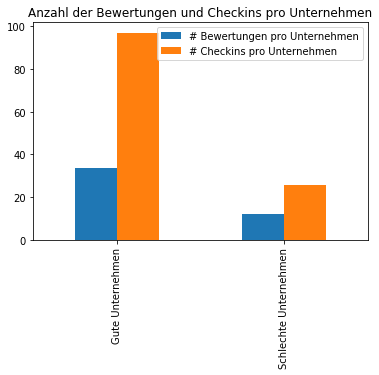

In [116]:
pltdf1.plot(kind="bar",title="Anzahl der Bewertungen und Checkins pro Unternehmen")

In [117]:
mergeDFGood=pd.merge(BusinessGood,BusinessHours,on="business_id")

In [118]:
mergeDFBad=pd.merge(BusinessBad,BusinessHours,on="business_id")

In [119]:
antSaOpenGood=1-mergeDFGood.saturday.isna().sum()/mergeDFGood.business_id.size

In [120]:
antSaOpenBad=1-mergeDFBad.saturday.isna().sum()/mergeDFBad.business_id.size

In [121]:
antSoOpenGood=1-mergeDFGood.sunday.isna().sum()/mergeDFGood.business_id.size

In [122]:
antSoOpenBad=1-mergeDFBad.sunday.isna().sum()/mergeDFBad.business_id.size

In [123]:
pltdf2=DataFrame({"Samstag geöffnet":[antSaOpenGood,antSaOpenBad],"Sonntag geöffnet":[antSoOpenGood,antSoOpenBad]},index=["Gute Unternehmen","Schlechte Unternehmen"])

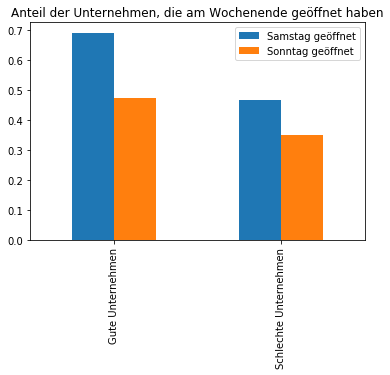

In [124]:
pltdf2.plot(kind="bar", title="Anteil der Unternehmen, die am Wochenende geöffnet haben")